# Statistics - HCI Iykra

## Import library

In [1]:
import numpy as np
import pandas as pd

## Load data

In [3]:
df = pd.read_excel('D:\Data Science Bootcamp\Day 5\dataset\data loan.xlsx')

In [4]:
df.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others
3,4,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,0.0,4.08,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan
4,5,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,0.0,4.60,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

In [6]:
numerical_data = df.select_dtypes(include = [np.number]).columns
categorical_data = df.select_dtypes(exclude = [np.number]).columns

In [7]:
numerical_data

Index(['Kontrak', 'Tenor', 'Total_AR', 'LTV', 'OTR', 'Age', 'Interest_Rate',
       'Income', 'DP', 'AF', 'Inflasi'],
      dtype='object')

In [8]:
categorical_data

Index(['Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Bucket_Collectability', 'NPF',
       'Tujuan', 'Pendidikan', 'Tanggungan', 'Status', 'Gender', 'Paket',
       'Segmen'],
      dtype='object')

## Transformasi Tipe_Kendaraan: Recoding

In [9]:
df['Tipe_Kendaraan'].value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

In [13]:
import copy

In [14]:
df_edit = copy.deepcopy(df)

In [17]:
df_edit['Tipe_Kendaraan'] = df_edit.Tipe_Kendaraan.map({'MINIBUS':'MINIBUS',
                                                      'LCGC':'NONMINIBUS',
                                                      'OTHERS':'NONMINIBUS',
                                                      'TRUCK & PICK UP':'NONMINIBUS'})

In [18]:
df_edit['Tipe_Kendaraan'].value_counts()

MINIBUS       14440
NONMINIBUS    13853
Name: Tipe_Kendaraan, dtype: int64

In [20]:
df_edit['Tipe_Kendaraan'].value_counts().index

Index(['MINIBUS', 'NONMINIBUS'], dtype='object')

Dummy Variable pasti akan dalam bentuk nominal binary

## Transformasi Area: Dummy

In [21]:
df_edit['Area'].value_counts()

Jawa        15677
Sumatera     9872
Others       2744
Name: Area, dtype: int64

In [22]:
D_Area = pd.get_dummies(df_edit['Area'], prefix = 'Area')

In [26]:
D_Area.head(3)

,Area_Jawa,Area_Others,Area_Sumatera
0,1,0,0
1,1,0,0
2,1,0,0


In [27]:
D_Area_Jawa = D_Area.drop(columns='Area_Jawa')

In [28]:
D_Area_Jawa.head(3)

,Area_Others,Area_Sumatera
0,0,0
1,0,0
2,0,0


In [29]:
df_edit = pd.concat([df_edit, D_Area_Jawa], axis = 1)

In [30]:
df_edit.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Area_Others,Area_Sumatera
0,1,NONMINIBUS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan,0,0
1,2,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others,0,0
2,3,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others,0,0


In [31]:
np.where(df_edit['Area']=='Jawa', 'Jawa', 'Luar Jawa')

array(['Jawa', 'Jawa', 'Jawa', ..., 'Luar Jawa', 'Luar Jawa', 'Jawa'],
      dtype='<U9')

## Discretization LTV (Binning)

In [33]:
discrete_LTV = pd.cut(df_edit.LTV, 5)

In [34]:
discrete_LTV.head()

0    (90.486, 111.83]
1    (90.486, 111.83]
2    (90.486, 111.83]
3    (90.486, 111.83]
4    (90.486, 111.83]
Name: LTV, dtype: category
Categories (5, interval[float64]): [(5.003, 26.454] < (26.454, 47.798] < (47.798, 69.142] < (69.142, 90.486] < (90.486, 111.83]]

## Transformasi Income: Standardisasi

In [35]:
df_edit.describe()['Income']

count    28293.000000
mean        20.449334
std        115.608090
min          1.000000
25%          9.000000
50%         15.000000
75%         20.000000
max      10000.000000
Name: Income, dtype: float64

In [38]:
standardized_income = (df_edit['Income'] - df_edit['Income'].mean()) / df_edit['Income'].std()

In [39]:
standardized_income.head()

0   -0.090386
1   -0.047136
2   -0.003887
3   -0.047136
4   -0.003887
Name: Income, dtype: float64

In [40]:
df_edit.Income.head()

0    10
1    15
2    20
3    15
4    20
Name: Income, dtype: int64

In [41]:
standardized_income.std()

0.9999999999999594

In [43]:
df_edit.Income.std()

115.60808970422566

In [44]:
from matplotlib import pyplot as plt

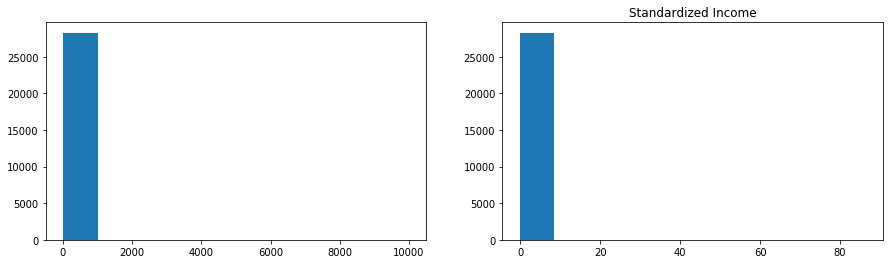

In [47]:
# visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(standardized_income)
ax2.set_title('Standardized Income')

plt.show()

In [48]:
ln_income = np.log(df_edit.Income)
ln_income.head()

0    2.302585
1    2.708050
2    2.995732
3    2.708050
4    2.995732
Name: Income, dtype: float64

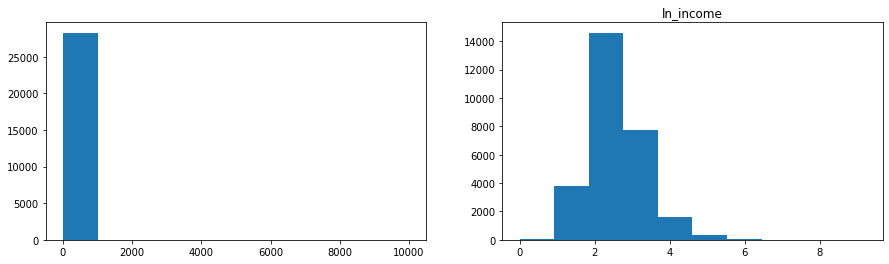

In [50]:
# visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(ln_income)
ax2.set_title('ln_income')

plt.show()

## Normalisasi Income

In [54]:
normalized_income = (df_edit['Income'] - df_edit['Income'].min()) / (df_edit['Income'].max() - df_edit['Income'].min())
normalized_income.head()

0    0.0009
1    0.0014
2    0.0019
3    0.0014
4    0.0019
Name: Income, dtype: float64

In [55]:
normalized_income.describe()

count    28293.000000
mean         0.001945
std          0.011562
min          0.000000
25%          0.000800
50%          0.001400
75%          0.001900
max          1.000000
Name: Income, dtype: float64

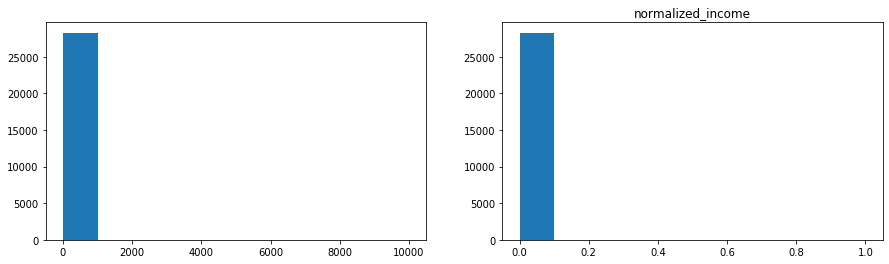

In [56]:
# visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(normalized_income)
ax2.set_title('normalized_income')

plt.show()

## Detecting Outliers

### Z Score

In [57]:
z_income = copy.deepcopy(standardized_income)

In [58]:
df_edit[['Kontrak', 'Income']][np.abs(z_income) > 3] # show only True values

,Kontrak,Income
4559,4560,1500
4611,4612,1000
4898,4899,500
4899,4900,500
4943,4944,500
4944,4945,500
4945,4946,500
5073,5074,10000
7457,7458,430
8291,8292,700


In [62]:
[np.abs(z_income) > 3]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 28288    False
 28289    False
 28290    False
 28291    False
 28292    False
 Name: Income, Length: 28293, dtype: bool]

In [65]:
Q1_income = df_edit['Income'].quantile(0.25)
Q3_income = df_edit['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

In [66]:
df_edit[['Kontrak', 'Income']][(df_edit.Income < (Q1_income - 1.5 * IQR_income)) |
                               (df_edit.Income > (Q3_income + 1.5 * IQR_income))].head()

,Kontrak,Income
86,87,50
126,127,100
127,128,60
187,188,50
204,205,40


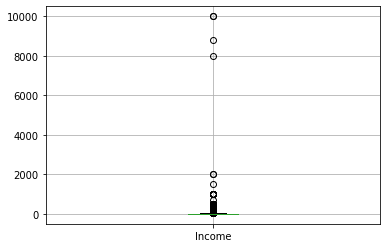

In [71]:
df_edit.boxplot(column='Income')
plt.show()

## Hypothesis Testing
Menguji perbedaan rata2 income antara kelompok NPF dan tidak NPF. Gunakan level signifikansi sebesar 5%

In [72]:
from scipy.stats import ttest_ind

In [73]:
x1 = df_edit['Income'][df_edit['NPF']=='Ya']
x2 = df_edit['Income'][df_edit['NPF']!='Ya']

In [74]:
ttest_ind(x1, x2, equal_var = True) # asumsi variance nya sama

Ttest_indResult(statistic=1.1605323548958912, pvalue=0.2458419213508887)

## Interpretasi
Karena pvalue > 0.05 maka H0 gagal ditolak, sehingga dapat disimpulkan bahwa rata2 income kelompok NPF dan tidak NPF tidak berbeda secara signifikan.

In [75]:
print('deviasi standar x1 = %.3f dan x2 = %.3f' %(x1.std(), x2.std()))

deviasi standar x1 = 160.307 dan x2 = 37.691


Karena deviasi standar x1 dua kali lebih besar daripada x2 maka kita tidak bisa mengasumsikan variance sama, sehingga perlu diasumsikan variance antara income NPF dan tidak NPF berbeda.

In [77]:
ttest_ind(x1, x2, equal_var = False) # asumsi variance nya beda

Ttest_indResult(statistic=1.1440147059898442, pvalue=0.25263531221651053)

Meskipun kesimpulan yang dihasilkan sama, tetapi asumsi yang digunakan pada pengujian kedua (varians berbeda) lebih tepat

## Regresi Linear Sederhana

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [79]:
# input dataset
x = df_edit['Income']
y = df_edit['Total_AR']

In [80]:
# change data structure
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [81]:
regressor = LinearRegression()
regressor.fit(x, y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 213.955 + 0.040 X


In [86]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

R2 = 0.003


## Pemodelan dengan statsmodels

In [90]:
mc = pd.read_excel('D:\Data Science Bootcamp\Day 5\dataset\data microchip.xlsx')

In [91]:
import statsmodels.formula.api as smf

In [96]:
ols_df_edit = smf.ols('Total_AR ~ Income', data = df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     78.35
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           9.10e-19
Time:                        16:23:32   Log-Likelihood:            -1.6691e+05
No. Observations:               28293   AIC:                         3.338e+05
Df Residuals:                   28291   BIC:                         3.338e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.9555      0.533    401.495      0.0

### Regresi pengaruh waktu terhadap number of component

In [93]:
ols_1_mc = smf.ols('number_of_component ~ year_since_1959', data = mc).fit()

In [95]:
print(ols_1_mc.summary())

                             OLS Regression Results                            
Dep. Variable:     number_of_component   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     7.688
Date:                 Fri, 25 Oct 2019   Prob (F-statistic):             0.0694
Time:                         16:19:38   Log-Likelihood:                -19.423
No. Observations:                    5   AIC:                             42.85
Df Residuals:                        3   BIC:                             42.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9434     1

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


## rmse dari statsmodels

In [99]:
from statsmodels.tools.eval_measures import rmse

In [100]:
rmse(mc.number_of_component, ols_1_mc.predict(mc.year_since_1959))

11.770445880527003

In [102]:
rmse(df_edit.Total_AR, ols_df_edit.predict(df_edit.Income))

88.26273035970209

In [103]:
ols_df_edit = smf.ols('Total_AR ~ Income + OTR + DP', data = df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 7.294e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:32:11   Log-Likelihood:            -1.3629e+05
No. Observations:               28293   AIC:                         2.726e+05
Df Residuals:                   28289   BIC:                         2.726e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5643      0.494     53.800      0.0